In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('data/aggregated_df.csv')
df.columns

Index(['match_id', 'inning', 'bowling_team', 'batter', 'batter_total_balls',
       'batter_SR', 'batter_score', 'dismissal_kind', 'date', 'match_type',
       'venue', 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'],
      dtype='object')

In [22]:
df.drop(columns=['batter_total_balls', "batter_SR", "dismissal_kind", "match_id", "date", 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'], inplace=True)

In [23]:
df = df.reindex(columns=[col for col in df.columns if col != 'batter_score'] + ['batter_score'])
df.columns

Index(['inning', 'bowling_team', 'batter', 'match_type', 'venue',
       'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'batter_score'],
      dtype='object')

In [24]:
player = 'RG Sharma'
gdf = df[df['batter'] == player]
gdf.drop(columns=['batter'], inplace=True)

gdf = gdf.fillna(-1).astype({"no_of_left_arm_offspinners_faced": 'int'})

#print(gdf.dtypes)

/var/folders/xn/1qlh6svd3jz7qk3ry827bz780000gn/T/ipykernel_59731/2846809981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.drop(columns=['batter'], inplace=True)


In [25]:
gdf.columns

Index(['inning', 'bowling_team', 'match_type', 'venue',
       'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'batter_score'],
      dtype='object')

In [26]:
X = gdf.iloc[:, :-1].values
y = gdf.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
ct1 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-8])], remainder = 'passthrough')
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-7])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

In [27]:
y = y.reshape(len(y), 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, X_train.shape[1] - 6:] = sc_X.fit_transform(X_train[:, X_train.shape[1] - 6:])
X_test[:, X_train.shape[1] - 6:] = sc_X.transform(X_test[:, X_train.shape[1] - 6:])
y_train = sc_y.fit_transform(y_train)

In [30]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [31]:
def MLR(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [32]:
def DT(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [33]:
def RF(X_train, y_train, X_test, y_test):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))
    
    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [34]:
def SVR(X_train, y_train, X_test, y_test):    
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [35]:
X[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0, 0, 0, 0, 0, 1],
      dtype=object)

[[ 2.44e+01  2.40e+01]
 [ 8.53e+00  1.50e+01]
 [ 2.47e+01  2.00e+01]
 [ 2.82e+01  4.20e+01]
 [-8.09e+00  7.00e+00]
 [ 2.08e+01  2.00e+01]
 [ 4.10e+01  5.00e+01]
 [-1.22e+00  0.00e+00]
 [ 2.29e+01  2.00e+01]
 [ 2.83e+01  6.80e+01]
 [ 1.51e+01  1.50e+01]
 [-1.81e+14  6.70e+01]
 [ 2.38e+01  4.30e+01]
 [ 6.45e+01  5.10e+01]
 [ 2.81e+01  2.80e+01]
 [ 1.77e+01  1.10e+01]
 [-1.81e+14  4.00e+00]
 [-8.84e+00  0.00e+00]
 [ 2.50e+01  7.00e+01]
 [ 2.14e+01  3.50e+01]
 [ 1.06e+01  1.00e+01]
 [ 1.19e+01  2.00e+00]
 [ 2.07e+01  8.00e+00]
 [ 1.96e+01  2.30e+01]
 [-1.83e+00  6.00e+00]
 [-1.78e+00  6.00e+00]
 [ 5.51e+01  9.40e+01]
 [ 6.67e+01  3.60e+01]
 [ 1.05e+01  0.00e+00]
 [ 2.61e+01  3.10e+01]
 [-2.49e+00  1.80e+01]
 [ 4.45e+01  4.60e+01]
 [ 1.37e+01  8.00e+00]
 [ 4.72e+01  3.30e+01]
 [ 4.39e+01  2.70e+01]
 [ 1.02e+01  1.10e+01]
 [-2.40e+14  3.20e+01]
 [ 2.35e+01  4.10e+01]
 [ 8.62e+00  8.00e+00]
 [ 4.01e+01  3.90e+01]
 [ 3.83e+01  1.20e+01]
 [-2.12e+14  2.10e+01]
 [ 1.61e+00  1.00e+00]
 [ 3.75e+01

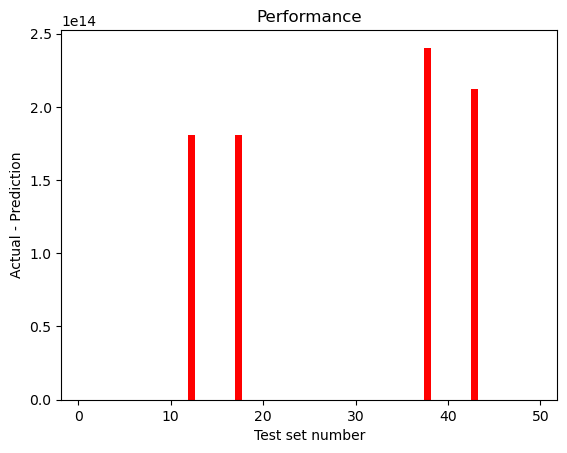

In [36]:
MLR(X_train, y_train, X_test, y_test)

[[2.40e+01 2.40e+01]
 [2.00e+00 1.50e+01]
 [4.80e+01 2.00e+01]
 [4.80e+01 4.20e+01]
 [3.00e+01 7.00e+00]
 [2.60e+01 2.00e+01]
 [4.80e+01 5.00e+01]
 [5.00e+00 0.00e+00]
 [1.10e+01 2.00e+01]
 [5.00e+01 6.80e+01]
 [7.00e+00 1.50e+01]
 [9.00e+00 6.70e+01]
 [2.00e+01 4.30e+01]
 [2.70e+01 5.10e+01]
 [6.00e+00 2.80e+01]
 [1.00e+00 1.10e+01]
 [3.55e-15 4.00e+00]
 [3.55e-15 0.00e+00]
 [1.20e+01 7.00e+01]
 [5.00e+00 3.50e+01]
 [2.00e+00 1.00e+01]
 [8.00e+00 2.00e+00]
 [2.00e+00 8.00e+00]
 [3.60e+01 2.30e+01]
 [1.20e+01 6.00e+00]
 [3.55e-15 6.00e+00]
 [4.50e+01 9.40e+01]
 [1.09e+02 3.60e+01]
 [1.00e+00 0.00e+00]
 [2.60e+01 3.10e+01]
 [5.00e+00 1.80e+01]
 [6.50e+01 4.60e+01]
 [5.00e+00 8.00e+00]
 [8.00e+01 3.30e+01]
 [6.50e+01 2.70e+01]
 [1.10e+01 1.10e+01]
 [7.90e+01 3.20e+01]
 [4.20e+01 4.10e+01]
 [1.40e+01 8.00e+00]
 [1.30e+01 3.90e+01]
 [6.00e+01 1.20e+01]
 [3.90e+01 2.10e+01]
 [3.55e-15 1.00e+00]
 [3.60e+01 1.80e+01]
 [1.30e+01 5.00e+01]
 [1.40e+01 3.30e+01]
 [3.60e+01 4.40e+01]
 [1.80e+01 1.

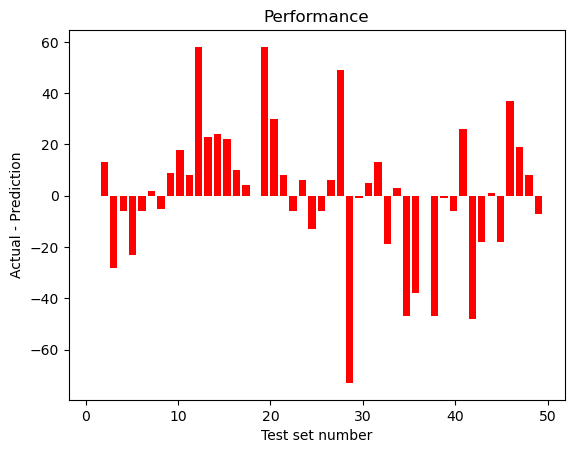

In [37]:
DT(X_train, y_train, X_test, y_test)

[[22.1  24.  ]
 [ 3.   15.  ]
 [48.2  20.  ]
 [31.62 42.  ]
 [12.2   7.  ]
 [27.2  20.  ]
 [48.2  50.  ]
 [ 5.    0.  ]
 [ 6.4  20.  ]
 [45.6  68.  ]
 [14.2  15.  ]
 [38.7  67.  ]
 [28.4  43.  ]
 [31.4  51.  ]
 [17.1  28.  ]
 [ 5.9  11.  ]
 [ 0.4   4.  ]
 [ 1.1   0.  ]
 [29.7  70.  ]
 [ 8.7  35.  ]
 [ 3.5  10.  ]
 [ 7.7   2.  ]
 [ 5.9   8.  ]
 [45.8  23.  ]
 [10.4   6.  ]
 [ 1.9   6.  ]
 [51.6  94.  ]
 [61.9  36.  ]
 [ 4.2   0.  ]
 [21.6  31.  ]
 [ 3.9  18.  ]
 [51.77 46.  ]
 [ 8.4   8.  ]
 [64.6  33.  ]
 [60.   27.  ]
 [ 7.1  11.  ]
 [48.9  32.  ]
 [42.4  41.  ]
 [14.7   8.  ]
 [47.77 39.  ]
 [36.4  12.  ]
 [43.4  21.  ]
 [ 1.1   1.  ]
 [45.6  18.  ]
 [32.2  50.  ]
 [27.6  33.  ]
 [43.3  44.  ]
 [11.3  11.  ]]
r2_score is 0.347750951640978


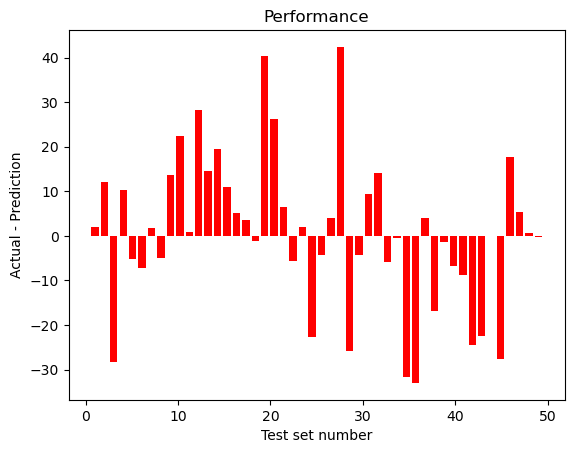

In [38]:
RF(X_train, y_train, X_test, y_test)

[[18.51 24.  ]
 [ 3.   15.  ]
 [29.38 20.  ]
 [23.62 42.  ]
 [ 8.08  7.  ]
 [24.75 20.  ]
 [39.24 50.  ]
 [ 2.03  0.  ]
 [18.51 20.  ]
 [35.47 68.  ]
 [ 7.5  15.  ]
 [31.79 67.  ]
 [30.97 43.  ]
 [45.12 51.  ]
 [20.29 28.  ]
 [ 5.68 11.  ]
 [ 1.14  4.  ]
 [ 1.04  0.  ]
 [31.48 70.  ]
 [13.46 35.  ]
 [ 2.71 10.  ]
 [ 8.13  2.  ]
 [ 3.8   8.  ]
 [28.4  23.  ]
 [ 8.15  6.  ]
 [ 2.41  6.  ]
 [54.83 94.  ]
 [50.9  36.  ]
 [ 8.94  0.  ]
 [24.24 31.  ]
 [ 6.03 18.  ]
 [49.41 46.  ]
 [ 9.45  8.  ]
 [53.61 33.  ]
 [40.6  27.  ]
 [18.69 11.  ]
 [33.94 32.  ]
 [38.69 41.  ]
 [10.7   8.  ]
 [41.94 39.  ]
 [34.31 12.  ]
 [32.17 21.  ]
 [ 4.7   1.  ]
 [46.79 18.  ]
 [33.27 50.  ]
 [21.21 33.  ]
 [54.34 44.  ]
 [17.56 11.  ]]
r2_score is 0.518442209742439


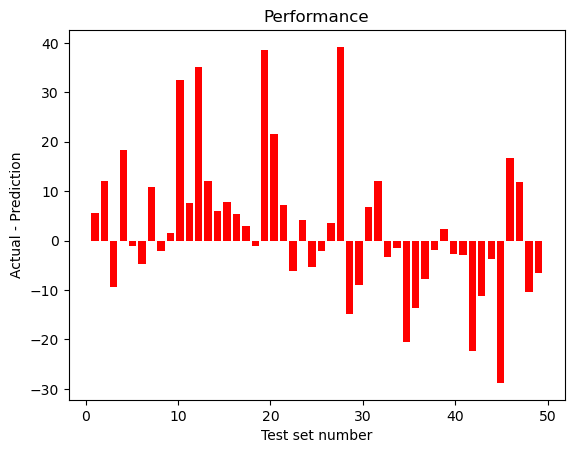

In [39]:
SVR(X_train, y_train, X_test, y_test)
